## Genearate dataset having 2 features and 2 classes for classification

In [1]:
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=100, 
                          n_features=2,
                          n_classes= 2, n_clusters_per_class=1,
                          n_informative=1, n_redundant=0
)

In [2]:
x,y

(array([[-0.43862953,  1.51342227],
        [ 0.46697391, -1.26135194],
        [ 0.30820531, -1.41991153],
        [-1.34004056, -0.61779109],
        [-0.89353563,  1.20195203],
        [-1.81026021, -1.19112096],
        [-0.01379726,  0.96327771],
        [-0.47801767,  2.19667923],
        [ 2.127203  , -0.329148  ],
        [ 2.2237766 ,  2.38579122],
        [ 0.75816045, -0.42123825],
        [-1.05854676, -1.65671036],
        [-0.24898804, -0.60603142],
        [ 0.00794886, -0.68089732],
        [-0.58253836,  0.99507367],
        [ 0.31666483,  1.14863454],
        [-0.48696453,  0.60746299],
        [ 0.71612418,  2.6505311 ],
        [-0.32914191, -0.64589524],
        [ 0.2583713 , -1.31396463],
        [ 0.7352917 ,  0.75834835],
        [-0.66768178, -1.19858358],
        [ 0.69823774, -1.05325605],
        [ 1.08204303,  1.13077851],
        [-1.60692132,  1.54171485],
        [-2.07746145,  1.1051443 ],
        [ 1.45002402,  1.45599297],
        [-1.83358239,  1.204

In [3]:
x.shape

(100, 2)

## plotting the dataset

In [4]:
import matplotlib.pyplot as plt

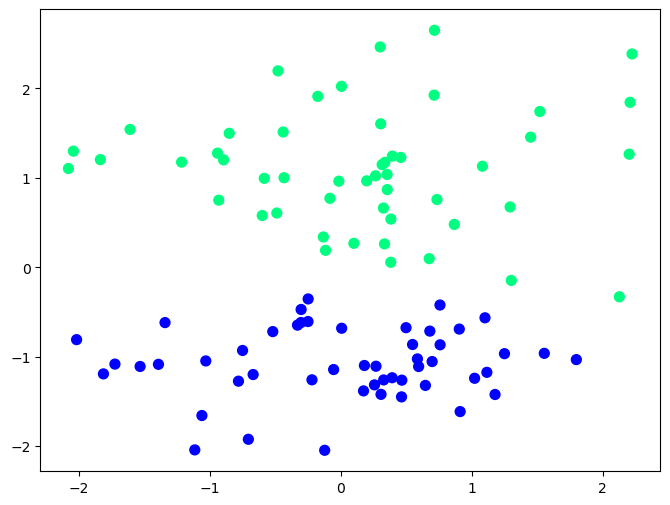

In [5]:
plt.figure(figsize=(8,6))
# feature 1 = x[0] and feature 2 = x[1], classes = 2, 
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=50)


## Create a perceptron

![perceptron](perceptron.png)


In [6]:
import numpy as np

x = np.insert(x,0,1,axis=1)
x

weights = np.ones(x.shape[1]) # as we need only 1 weight for every input neuron in x
weights

In [7]:
def step(n):
    return 1 if n>0 else 0

In [8]:
def perceptron(x,y):
    x = np.insert(x,0,1,axis=1) # insert 1 as bias term at index 0 of x ex. [ 1.        ,  0.34787011, -0.23084105]
    weights = np.ones(x.shape[1]) # as we need only 1 weight for every input neuron in x
    lr = 0.1
    epochs = 300
    
    #training
    for i in range(epochs):
        j = np.random.randint(0,100) # as we have only 100 samples, we select a random sample from them
        y_hat = step( np.dot( x[j], weights ))
        #update weights 
        weights = weights + lr*( y[j]-y_hat )*x[j]
    
    return weights[0],weights[1:]


## Training the perceptron and getting the weights

#### weights = [ bias coeff_A coeff_B] as our equation is Ax1+ Bx2 + bias = 0

In [9]:
bias, coef = perceptron(x,y)

In [10]:
print("bias term : ",bias)
print("coefficients : ",coef)

bias term :  0.30000000000000016
coefficients :  [0.51768352 1.54907383]


## Plot the line given by weights after training

equation of line is Ax+By+C = 0
thus in form y = mx + c , m = -A/B and c = -C/B

In [11]:
m = - coef[0]/coef[1]
c = - bias/coef[1]

In [12]:
m , c

(-0.3341890562149615, -0.19366410702985468)

In [13]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

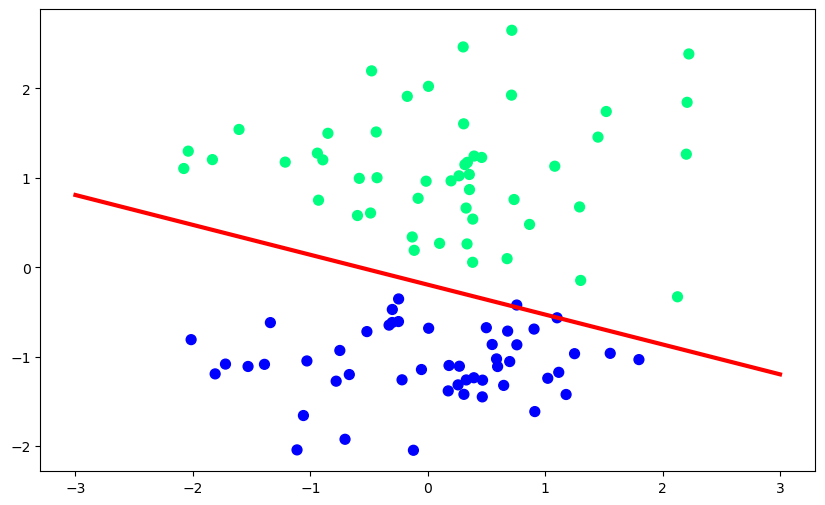

In [14]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=50)